<a href="https://colab.research.google.com/github/aalemay/Data-Science-ML-Training/blob/main/Sports_Scraping_and_Graphing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import requests

url = "https://api-football-v1.p.rapidapi.com/v3/fixtures"

querystring = {"league":"39","season":"2021"}

headers = {
	"x-rapidapi-key": "XXXX",
	"x-rapidapi-host": "api-football-v1.p.rapidapi.com"
}

response = requests.get(url, headers=headers, params=querystring)
fixtures_2021 = response.json()['response']

In [4]:
fixtures_2021[0]

{'fixture': {'id': 710556,
  'referee': 'M. Oliver',
  'timezone': 'UTC',
  'date': '2021-08-13T19:00:00+00:00',
  'timestamp': 1628881200,
  'periods': {'first': 1628881200, 'second': 1628884800},
  'venue': {'id': 10503,
   'name': 'Brentford Community Stadium',
   'city': 'Brentford, Middlesex'},
  'status': {'long': 'Match Finished',
   'short': 'FT',
   'elapsed': 90,
   'extra': None}},
 'league': {'id': 39,
  'name': 'Premier League',
  'country': 'England',
  'logo': 'https://media.api-sports.io/football/leagues/39.png',
  'flag': 'https://media.api-sports.io/flags/gb-eng.svg',
  'season': 2021,
  'round': 'Regular Season - 1',
  'standings': True},
 'teams': {'home': {'id': 55,
   'name': 'Brentford',
   'logo': 'https://media.api-sports.io/football/teams/55.png',
   'winner': True},
  'away': {'id': 42,
   'name': 'Arsenal',
   'logo': 'https://media.api-sports.io/football/teams/42.png',
   'winner': False}},
 'goals': {'home': 2, 'away': 0},
 'score': {'halftime': {'home': 1

In [31]:
import requests

url = "https://api-football-v1.p.rapidapi.com/v3/fixtures"

querystring = {"league":"39","season":"2022"}

headers = {
	"x-rapidapi-key": "XXXX",
	"x-rapidapi-host": "api-football-v1.p.rapidapi.com"
}

response = requests.get(url, headers=headers, params=querystring)
fixtures_2022 = response.json()['response']

In [32]:
import requests

url = "https://api-football-v1.p.rapidapi.com/v3/fixtures"

querystring = {"league":"39","season":"2023"}

headers = {
	"x-rapidapi-key": "XXXX",
	"x-rapidapi-host": "api-football-v1.p.rapidapi.com"
}

response = requests.get(url, headers=headers, params=querystring)
fixtures_2023 = response.json()['response']

In [35]:
import pandas as pd
def make_dataframe_from_response(response_entry, entry_num):
  home_score = response_entry.get('goals', {}).get('home', None)
  away_score = response_entry.get('goals', {}).get('away', None)
  dt = pd.to_datetime(response_entry.get('fixture', {}).get('date', 0))
  date_only = dt.strftime("%Y-%m-%d")
  time_only = dt.strftime("%H:%M")
  if home_score is None or away_score is None:
    return None
  games_dict = {
      'Home Team': response_entry.get('teams', {}).get('home', {}).get('name', ''),
      'Away Team': response_entry.get('teams', {}).get('away', {}).get('name', ''),
      'Date': date_only,
      'Time': time_only,
      'Home Win': int(home_score > away_score),
      'City': response_entry.get('fixture', {}).get('venue', {}).get('city', '').split(',')[0],
      'Team' : 'Soccer',
      'Datetime': dt,
      'Season': response_entry.get('league', {}).get('season', '')

  }
  return pd.DataFrame(games_dict, index=[entry_num])
soccer_data_2021 = make_dataframe_from_response(fixtures_2021[0], 0)
for i in range(1, len(fixtures_2021)):
  temp_df = make_dataframe_from_response(fixtures_2021[i], i)
  if temp_df is not None:
    soccer_data_2021 = pd.concat([soccer_data_2021, temp_df])
attendance_2021 = pd.read_csv("/content/Soccer Attendances 2021 - Sheet1 (1).csv")

soccer_data_2021 = soccer_data_2021.merge(attendance_2021, left_on='Home Team', right_on="Football club", how="left")
soccer_data_2021.rename(columns={'Average attendance[202]': 'AVG'}, inplace=True)
soccer_data_2021.drop(columns=['#', 'Football club', 'Home games'], inplace=True)
soccer_data_2021

,Home Team,Away Team,Date,Time,Home Win,City,Team,Datetime,Season,AVG
0,Brentford,Arsenal,2021-08-13,19:00,1,Brentford,Soccer,2021-08-13 19:00:00+00:00,2021,"16,912"
1,Manchester United,Leeds,2021-08-14,11:30,1,Manchester,Soccer,2021-08-14 11:30:00+00:00,2021,"73,150"
2,Watford,Aston Villa,2021-08-14,14:00,1,Watford,Soccer,2021-08-14 14:00:00+00:00,2021,"20,614"
3,Burnley,Brighton,2021-08-14,14:00,0,Burnley,Soccer,2021-08-14 14:00:00+00:00,2021,"19,399"
4,Everton,Southampton,2021-08-14,14:00,1,Liverpool,Soccer,2021-08-14 14:00:00+00:00,2021,"38,945"
...,...,...,...,...,...,...,...,...,...,...
375,Manchester City,Aston Villa,2022-05-22,15:00,1,Manchester,Soccer,2022-05-22 15:00:00+00:00,2021,"52,774"
376,Brighton,West Ham,2022-05-22,15:00,1,Falmer,Soccer,2022-05-22 15:00:00+00:00,2021,"30,988"
377,Crystal Palace,Manchester United,2022-05-22,15:00,1,London,Soccer,2022-05-22 15:00:00+00:00,2021,"24,282"
378,Brentford,Leeds,2022-05-22,15:00,0,Brentford,Soccer,2022-05-22 15:00:00+00:00,2021,"16,912"


In [44]:
soccer_data_2022 = make_dataframe_from_response(fixtures_2022[0], i)
for i in range(1, len(fixtures_2022)):
  temp_df = make_dataframe_from_response(fixtures_2022[i], i)
  if temp_df is not None:
    soccer_data_2022 = pd.concat([soccer_data_2022, temp_df])
attendance_2022 = pd.read_csv("/content/Soccer Attendances 2021 - 2022.csv")

soccer_data_2022 = soccer_data_2022.merge(attendance_2022, left_on='Home Team', right_on="Football club", how="left")
soccer_data_2022.rename(columns={'Average attendance[183]': 'AVG'}, inplace=True)
soccer_data_2022.drop(columns=['#', 'Football club', 'Home games'], inplace=True)
soccer_data_2022

,Home Team,Away Team,Date,Time,Home Win,City,Team,Datetime,Season,AVG
0,Crystal Palace,Arsenal,2022-08-05,19:00,0,London,Soccer,2022-08-05 19:00:00+00:00,2022,"25,209"
1,Fulham,Liverpool,2022-08-06,11:30,0,London,Soccer,2022-08-06 11:30:00+00:00,2022,"23,746"
2,Newcastle,Nottingham Forest,2022-08-06,14:00,1,Newcastle upon Tyne,Soccer,2022-08-06 14:00:00+00:00,2022,"52,127"
3,Bournemouth,Aston Villa,2022-08-06,14:00,1,Bournemouth,Soccer,2022-08-06 14:00:00+00:00,2022,"10,362"
4,Tottenham,Southampton,2022-08-06,14:00,1,London,Soccer,2022-08-06 14:00:00+00:00,2022,"61,585"
...,...,...,...,...,...,...,...,...,...,...
375,Chelsea,Newcastle,2023-05-28,15:30,0,London,Soccer,2023-05-28 15:30:00+00:00,2022,"40,002"
376,Crystal Palace,Nottingham Forest,2023-05-28,15:30,0,London,Soccer,2023-05-28 15:30:00+00:00,2022,"25,209"
377,Brentford,Manchester City,2023-05-28,15:30,1,Brentford,Soccer,2023-05-28 15:30:00+00:00,2022,"17,078"
378,Leeds,Tottenham,2023-05-28,15:30,0,Leeds,Soccer,2023-05-28 15:30:00+00:00,2022,"36,566"


In [45]:
soccer_data_2023 = make_dataframe_from_response(fixtures_2023[0], i)
for i in range(1, len(fixtures_2023)):
  temp_df = make_dataframe_from_response(fixtures_2023[i], i)
  if temp_df is not None:
    soccer_data_2023 = pd.concat([soccer_data_2023, temp_df])
soccer_data_2023['Home Team'].unique()
attendance_2023 = pd.read_csv("/content/Soccer Attendances 2021 - Sheet3.csv")

soccer_data_2023 = soccer_data_2023.merge(attendance_2023, left_on='Home Team', right_on="Football club", how="left")
soccer_data_2023.rename(columns={'Average attendance[214]': 'AVG'}, inplace=True)
soccer_data_2023.drop(columns=['#', 'Football club', 'Home games'], inplace=True)
soccer_data_2023

,Home Team,Away Team,Date,Time,Home Win,City,Team,Datetime,Season,AVG
0,Burnley,Manchester City,2023-08-11,19:00,0,Burnley,Soccer,2023-08-11 19:00:00+00:00,2023,"21,184"
1,Arsenal,Nottingham Forest,2023-08-12,11:30,1,London,Soccer,2023-08-12 11:30:00+00:00,2023,"60,236"
2,Bournemouth,West Ham,2023-08-12,14:00,0,Bournemouth,Soccer,2023-08-12 14:00:00+00:00,2023,"11,103"
3,Everton,Fulham,2023-08-12,14:00,0,Liverpool,Soccer,2023-08-12 14:00:00+00:00,2023,"39,042"
4,Brighton,Luton,2023-08-12,14:00,1,Falmer,Soccer,2023-08-12 14:00:00+00:00,2023,"31,586"
...,...,...,...,...,...,...,...,...,...,...
375,Brighton,Manchester United,2024-05-19,15:00,0,Falmer,Soccer,2024-05-19 15:00:00+00:00,2023,"31,586"
376,Crystal Palace,Aston Villa,2024-05-19,15:00,1,London,Soccer,2024-05-19 15:00:00+00:00,2023,"24,932"
377,Brentford,Newcastle,2024-05-19,15:00,0,Brentford,Soccer,2024-05-19 15:00:00+00:00,2023,"17,082"
378,Sheffield Utd,Tottenham,2024-05-19,15:00,0,Sheffield,Soccer,2024-05-19 15:00:00+00:00,2023,"30,011"


In [46]:
soccer_data = pd.concat([soccer_data_2021, soccer_data_2022, soccer_data_2023])

In [47]:
soccer_data

,Home Team,Away Team,Date,Time,Home Win,City,Team,Datetime,Season,AVG
0,Brentford,Arsenal,2021-08-13,19:00,1,Brentford,Soccer,2021-08-13 19:00:00+00:00,2021,"16,912"
1,Manchester United,Leeds,2021-08-14,11:30,1,Manchester,Soccer,2021-08-14 11:30:00+00:00,2021,"73,150"
2,Watford,Aston Villa,2021-08-14,14:00,1,Watford,Soccer,2021-08-14 14:00:00+00:00,2021,"20,614"
3,Burnley,Brighton,2021-08-14,14:00,0,Burnley,Soccer,2021-08-14 14:00:00+00:00,2021,"19,399"
4,Everton,Southampton,2021-08-14,14:00,1,Liverpool,Soccer,2021-08-14 14:00:00+00:00,2021,"38,945"
...,...,...,...,...,...,...,...,...,...,...
375,Brighton,Manchester United,2024-05-19,15:00,0,Falmer,Soccer,2024-05-19 15:00:00+00:00,2023,"31,586"
376,Crystal Palace,Aston Villa,2024-05-19,15:00,1,London,Soccer,2024-05-19 15:00:00+00:00,2023,"24,932"
377,Brentford,Newcastle,2024-05-19,15:00,0,Brentford,Soccer,2024-05-19 15:00:00+00:00,2023,"17,082"
378,Sheffield Utd,Tottenham,2024-05-19,15:00,0,Sheffield,Soccer,2024-05-19 15:00:00+00:00,2023,"30,011"


BASEBALL SCRAPING

In [48]:
import requests

url = "https://api-baseball.p.rapidapi.com/games"

querystring = {"league":"1","season":"2022"}

headers = {
	"x-rapidapi-key": "XXX",
	"x-rapidapi-host": "api-baseball.p.rapidapi.com"
}

response = requests.get(url, headers=headers, params=querystring)
games_2022 = response.json()

In [54]:
games_2022 = games_2022['response']

In [97]:
import pandas as pd
def make_baseball_dataframe_from_response(response_entry, entry_num):
  home_score = response_entry.get('scores', {}).get('home', {}).get('total', None)
  away_score = response_entry.get('scores', {}).get('away', {}).get('total', None)
  dt = pd.to_datetime(response_entry.get('date', 0))
  date_only = dt.strftime("%Y-%m-%d")
  time_only = dt.strftime("%H:%M")
  if home_score is None or away_score is None:
    return None
  games_dict = {
      'Home Team': response_entry.get('teams', {}).get('home', {}).get('name', ''),
      'Away Team': response_entry.get('teams', {}).get('away', {}).get('name', ''),
      'Date': date_only,
      'Time': time_only,
      'Home Win': int(home_score > away_score),
      'City': response_entry.get('teams', {}).get('home', {}).get('name', '').split(' ')[0],
      'Team' : 'MLB',
      'Datetime': dt,
      'Season': response_entry.get('league', {}).get('season', '')

  }
  return pd.DataFrame(games_dict, index=[entry_num])
baseball_games_2022 = make_baseball_dataframe_from_response(games_2022[0], 0)
for i in range(1, len(games_2022)):
  temp_df = make_baseball_dataframe_from_response(games_2022[i], i)
  if temp_df is not None:
    baseball_games_2022 = pd.concat([baseball_games_2022, temp_df])
baseball_attendance_2022 = pd.read_csv("/content/Baseball Attendances - 2022 (1).csv")

baseball_games_2022 = baseball_games_2022.merge(baseball_attendance_2022, left_on='Home Team', right_on="TEAM", how="left")
baseball_games_2022.drop(columns=['RK', 'GMS', 'TOTAL', 'TEAM'], inplace=True)
baseball_games_2022

,Home Team,Away Team,Date,Time,Home Win,City,Team,Datetime,Season,AVG
0,Boston Red Sox,Minnesota Twins,2022-03-17,17:05,1,Boston,MLB,2022-03-17 17:05:00+00:00,2022,"32,408"
1,Chicago White Sox,Chicago Cubs,2022-03-17,20:05,1,Chicago,MLB,2022-03-17 20:05:00+00:00,2022,"24,704"
2,Chicago Cubs,Chicago White Sox,2022-03-17,20:05,0,Chicago,MLB,2022-03-17 20:05:00+00:00,2022,"32,305"
3,Colorado Rockies,Arizona Diamondbacks,2022-03-17,20:10,1,Colorado,MLB,2022-03-17 20:10:00+00:00,2022,"32,467"
4,Atlanta Braves,Minnesota Twins,2022-03-18,17:05,1,Atlanta,MLB,2022-03-18 17:05:00+00:00,2022,"38,641"
...,...,...,...,...,...,...,...,...,...,...
2734,Houston Astros,Philadelphia Phillies,2022-10-30,01:03,1,Houston,MLB,2022-10-30 01:03:00+00:00,2022,"33,197"
2735,Philadelphia Phillies,Houston Astros,2022-11-02,00:03,1,Philadelphia,MLB,2022-11-02 00:03:00+00:00,2022,"28,459"
2736,Philadelphia Phillies,Houston Astros,2022-11-03,00:03,0,Philadelphia,MLB,2022-11-03 00:03:00+00:00,2022,"28,459"
2737,Philadelphia Phillies,Houston Astros,2022-11-04,00:03,0,Philadelphia,MLB,2022-11-04 00:03:00+00:00,2022,"28,459"


In [95]:
baseball_games_2022.drop(1652, inplace=True)

In [96]:
team_to_city = {
    "Arizona Diamondbacks": "Arizona",
    "Atlanta Braves": "Atlanta",
    "Baltimore Orioles": "Baltimore",
    "Boston Red Sox": "Boston",
    "Chicago White Sox": "Chicago",
    "Chicago Cubs": "Chicago",
    "Cincinnati Reds": "Cincinnati",
    "Cleveland Guardians": "Cleveland",
    "Colorado Rockies": "Denver",
    "Detroit Tigers": "Detroit",
    "Houston Astros": "Houston",
    "Kansas City Royals": "Kansas City",
    "Los Angeles Angels": "Los Angeles",
    "Los Angeles Dodgers": "Los Angeles",
    "Miami Marlins": "Miami",
    "Milwaukee Brewers": "Milwaukee",
    "Minnesota Twins": "Minnesota",
    "New York Yankees": "New York",
    "New York Mets": "New York",
    "Oakland Athletics": "Oakland",
    "Philadelphia Phillies": "Philadelphia",
    "Pittsburgh Pirates": "Pittsburgh",
    "San Diego Padres": "San Diego",
    "San Francisco Giants": "San Francisco",
    "Seattle Mariners": "Seattle",
    "St.Louis Cardinals": "St. Louis",
    "Tampa Bay Rays": "Tampa Bay",
    "Texas Rangers": "Texas",
    "Toronto Blue Jays": "Toronto",
    "Washington Nationals": "Washington"
}

baseball_games_2022["City"] = baseball_games_2022["Home Team"].map(team_to_city)
baseball_games_2022

,Home Team,Away Team,Date,Time,Home Win,City,Team,Datetime,Season,TEAM,AVG
0,Boston Red Sox,Minnesota Twins,2022-03-17,17:05,1,Boston,MLB,2022-03-17 17:05:00+00:00,2022,Boston Red Sox,"32,408"
1,Chicago White Sox,Chicago Cubs,2022-03-17,20:05,1,Chicago,MLB,2022-03-17 20:05:00+00:00,2022,Chicago White Sox,"24,704"
2,Chicago Cubs,Chicago White Sox,2022-03-17,20:05,0,Chicago,MLB,2022-03-17 20:05:00+00:00,2022,Chicago Cubs,"32,305"
3,Colorado Rockies,Arizona Diamondbacks,2022-03-17,20:10,1,Denver,MLB,2022-03-17 20:10:00+00:00,2022,Colorado Rockies,"32,467"
4,Atlanta Braves,Minnesota Twins,2022-03-18,17:05,1,Atlanta,MLB,2022-03-18 17:05:00+00:00,2022,Atlanta Braves,"38,641"
...,...,...,...,...,...,...,...,...,...,...,...
2734,Houston Astros,Philadelphia Phillies,2022-10-30,01:03,1,Houston,MLB,2022-10-30 01:03:00+00:00,2022,Houston Astros,"33,197"
2735,Philadelphia Phillies,Houston Astros,2022-11-02,00:03,1,Philadelphia,MLB,2022-11-02 00:03:00+00:00,2022,Philadelphia Phillies,"28,459"
2736,Philadelphia Phillies,Houston Astros,2022-11-03,00:03,0,Philadelphia,MLB,2022-11-03 00:03:00+00:00,2022,Philadelphia Phillies,"28,459"
2737,Philadelphia Phillies,Houston Astros,2022-11-04,00:03,0,Philadelphia,MLB,2022-11-04 00:03:00+00:00,2022,Philadelphia Phillies,"28,459"


In [98]:
#Moving columns to line up
column_to_move = "Team"
baseball_games_2022 = baseball_games_2022[[col for col in baseball_games_2022.columns if col != column_to_move] + [column_to_move]]
column_to_move = "Datetime"
baseball_games_2022 = baseball_games_2022[[col for col in baseball_games_2022.columns if col != column_to_move] + [column_to_move]]
baseball_games_2022

,Home Team,Away Team,Date,Time,Home Win,City,Season,AVG,Team,Datetime
0,Boston Red Sox,Minnesota Twins,2022-03-17,17:05,1,Boston,2022,"32,408",MLB,2022-03-17 17:05:00+00:00
1,Chicago White Sox,Chicago Cubs,2022-03-17,20:05,1,Chicago,2022,"24,704",MLB,2022-03-17 20:05:00+00:00
2,Chicago Cubs,Chicago White Sox,2022-03-17,20:05,0,Chicago,2022,"32,305",MLB,2022-03-17 20:05:00+00:00
3,Colorado Rockies,Arizona Diamondbacks,2022-03-17,20:10,1,Colorado,2022,"32,467",MLB,2022-03-17 20:10:00+00:00
4,Atlanta Braves,Minnesota Twins,2022-03-18,17:05,1,Atlanta,2022,"38,641",MLB,2022-03-18 17:05:00+00:00
...,...,...,...,...,...,...,...,...,...,...
2734,Houston Astros,Philadelphia Phillies,2022-10-30,01:03,1,Houston,2022,"33,197",MLB,2022-10-30 01:03:00+00:00
2735,Philadelphia Phillies,Houston Astros,2022-11-02,00:03,1,Philadelphia,2022,"28,459",MLB,2022-11-02 00:03:00+00:00
2736,Philadelphia Phillies,Houston Astros,2022-11-03,00:03,0,Philadelphia,2022,"28,459",MLB,2022-11-03 00:03:00+00:00
2737,Philadelphia Phillies,Houston Astros,2022-11-04,00:03,0,Philadelphia,2022,"28,459",MLB,2022-11-04 00:03:00+00:00


In [82]:
import requests

url = "https://api-baseball.p.rapidapi.com/games"

querystring = {"league":"1","season":"2023"}

headers = {
	"x-rapidapi-key": "XXXX",
	"x-rapidapi-host": "api-baseball.p.rapidapi.com"
}

response = requests.get(url, headers=headers, params=querystring)
games_2023 = response.json()['response']

In [99]:
baseball_games_2023 = make_baseball_dataframe_from_response(games_2022[0], 0)
for i in range(1, len(games_2022)):
  temp_df = make_baseball_dataframe_from_response(games_2022[i], i)
  if temp_df is not None:
    baseball_games_2023 = pd.concat([baseball_games_2023, temp_df])
baseball_attendance_2022 = pd.read_csv("/content/Baseball Attendances - 2023.csv")

baseball_games_2023 = baseball_games_2023.merge(baseball_attendance_2022, left_on='Home Team', right_on="TEAM", how="left")
baseball_games_2023.drop(columns=['RK', 'GMS', 'TOTAL', 'TEAM'], inplace=True)
baseball_games_2023["City"] = baseball_games_2023["Home Team"].map(team_to_city)
column_to_move = "Team"
baseball_games_2023 = baseball_games_2023[[col for col in baseball_games_2023.columns if col != column_to_move] + [column_to_move]]
column_to_move = "Datetime"
baseball_games_2023 = baseball_games_2023[[col for col in baseball_games_2023.columns if col != column_to_move] + [column_to_move]]
baseball_games_2023

,Home Team,Away Team,Date,Time,Home Win,City,Season,AVG,Team,Datetime
0,Boston Red Sox,Minnesota Twins,2022-03-17,17:05,1,Boston,2022,"32,989",MLB,2022-03-17 17:05:00+00:00
1,Chicago White Sox,Chicago Cubs,2022-03-17,20:05,1,Chicago,2022,"21,405",MLB,2022-03-17 20:05:00+00:00
2,Chicago Cubs,Chicago White Sox,2022-03-17,20:05,0,Chicago,2022,"34,261",MLB,2022-03-17 20:05:00+00:00
3,Colorado Rockies,Arizona Diamondbacks,2022-03-17,20:10,1,Denver,2022,"32,196",MLB,2022-03-17 20:10:00+00:00
4,Atlanta Braves,Minnesota Twins,2022-03-18,17:05,1,Atlanta,2022,"39,401",MLB,2022-03-18 17:05:00+00:00
...,...,...,...,...,...,...,...,...,...,...
2734,Houston Astros,Philadelphia Phillies,2022-10-30,01:03,1,Houston,2022,"37,683",MLB,2022-10-30 01:03:00+00:00
2735,Philadelphia Phillies,Houston Astros,2022-11-02,00:03,1,Philadelphia,2022,"38,157",MLB,2022-11-02 00:03:00+00:00
2736,Philadelphia Phillies,Houston Astros,2022-11-03,00:03,0,Philadelphia,2022,"38,157",MLB,2022-11-03 00:03:00+00:00
2737,Philadelphia Phillies,Houston Astros,2022-11-04,00:03,0,Philadelphia,2022,"38,157",MLB,2022-11-04 00:03:00+00:00


In [100]:
baseball_games_data = pd.concat([baseball_games_2022, baseball_games_2023])
baseball_games_data

,Home Team,Away Team,Date,Time,Home Win,City,Season,AVG,Team,Datetime
0,Boston Red Sox,Minnesota Twins,2022-03-17,17:05,1,Boston,2022,"32,408",MLB,2022-03-17 17:05:00+00:00
1,Chicago White Sox,Chicago Cubs,2022-03-17,20:05,1,Chicago,2022,"24,704",MLB,2022-03-17 20:05:00+00:00
2,Chicago Cubs,Chicago White Sox,2022-03-17,20:05,0,Chicago,2022,"32,305",MLB,2022-03-17 20:05:00+00:00
3,Colorado Rockies,Arizona Diamondbacks,2022-03-17,20:10,1,Colorado,2022,"32,467",MLB,2022-03-17 20:10:00+00:00
4,Atlanta Braves,Minnesota Twins,2022-03-18,17:05,1,Atlanta,2022,"38,641",MLB,2022-03-18 17:05:00+00:00
...,...,...,...,...,...,...,...,...,...,...
2734,Houston Astros,Philadelphia Phillies,2022-10-30,01:03,1,Houston,2022,"37,683",MLB,2022-10-30 01:03:00+00:00
2735,Philadelphia Phillies,Houston Astros,2022-11-02,00:03,1,Philadelphia,2022,"38,157",MLB,2022-11-02 00:03:00+00:00
2736,Philadelphia Phillies,Houston Astros,2022-11-03,00:03,0,Philadelphia,2022,"38,157",MLB,2022-11-03 00:03:00+00:00
2737,Philadelphia Phillies,Houston Astros,2022-11-04,00:03,0,Philadelphia,2022,"38,157",MLB,2022-11-04 00:03:00+00:00


In [101]:
new_sports_data = pd.concat([soccer_data, baseball_games_data])
new_sports_data

,Home Team,Away Team,Date,Time,Home Win,City,Team,Datetime,Season,AVG
0,Brentford,Arsenal,2021-08-13,19:00,1,Brentford,Soccer,2021-08-13 19:00:00+00:00,2021,"16,912"
1,Manchester United,Leeds,2021-08-14,11:30,1,Manchester,Soccer,2021-08-14 11:30:00+00:00,2021,"73,150"
2,Watford,Aston Villa,2021-08-14,14:00,1,Watford,Soccer,2021-08-14 14:00:00+00:00,2021,"20,614"
3,Burnley,Brighton,2021-08-14,14:00,0,Burnley,Soccer,2021-08-14 14:00:00+00:00,2021,"19,399"
4,Everton,Southampton,2021-08-14,14:00,1,Liverpool,Soccer,2021-08-14 14:00:00+00:00,2021,"38,945"
...,...,...,...,...,...,...,...,...,...,...
2734,Houston Astros,Philadelphia Phillies,2022-10-30,01:03,1,Houston,MLB,2022-10-30 01:03:00+00:00,2022,"37,683"
2735,Philadelphia Phillies,Houston Astros,2022-11-02,00:03,1,Philadelphia,MLB,2022-11-02 00:03:00+00:00,2022,"38,157"
2736,Philadelphia Phillies,Houston Astros,2022-11-03,00:03,0,Philadelphia,MLB,2022-11-03 00:03:00+00:00,2022,"38,157"
2737,Philadelphia Phillies,Houston Astros,2022-11-04,00:03,0,Philadelphia,MLB,2022-11-04 00:03:00+00:00,2022,"38,157"


In [104]:
new_sports_data = new_sports_data.dropna(subset=["AVG"])
new_sports_data["AVG"] = new_sports_data["AVG"].str.replace(",", "").astype(int)
new_sports_data

<ipython-input-104-16fd9634cc1b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_sports_data["AVG"] = new_sports_data["AVG"].str.replace(",", "").astype(int)


,Home Team,Away Team,Date,Time,Home Win,City,Team,Datetime,Season,AVG
0,Brentford,Arsenal,2021-08-13,19:00,1,Brentford,Soccer,2021-08-13 19:00:00+00:00,2021,16912
1,Manchester United,Leeds,2021-08-14,11:30,1,Manchester,Soccer,2021-08-14 11:30:00+00:00,2021,73150
2,Watford,Aston Villa,2021-08-14,14:00,1,Watford,Soccer,2021-08-14 14:00:00+00:00,2021,20614
3,Burnley,Brighton,2021-08-14,14:00,0,Burnley,Soccer,2021-08-14 14:00:00+00:00,2021,19399
4,Everton,Southampton,2021-08-14,14:00,1,Liverpool,Soccer,2021-08-14 14:00:00+00:00,2021,38945
...,...,...,...,...,...,...,...,...,...,...
2734,Houston Astros,Philadelphia Phillies,2022-10-30,01:03,1,Houston,MLB,2022-10-30 01:03:00+00:00,2022,37683
2735,Philadelphia Phillies,Houston Astros,2022-11-02,00:03,1,Philadelphia,MLB,2022-11-02 00:03:00+00:00,2022,38157
2736,Philadelphia Phillies,Houston Astros,2022-11-03,00:03,0,Philadelphia,MLB,2022-11-03 00:03:00+00:00,2022,38157
2737,Philadelphia Phillies,Houston Astros,2022-11-04,00:03,0,Philadelphia,MLB,2022-11-04 00:03:00+00:00,2022,38157


In [59]:
import pandas as pd
new_sports_data = pd.read_csv("new_sports_matches.csv")
new_sports_data.drop(columns=['Season'], inplace=True)
new_sports_data.rename(columns={'City': 'CITY'}, inplace=True)
processed_data = pd.read_csv("processed_data.csv")
all_data = pd.concat([new_sports_data, processed_data])
all_data

,Home Team,Away Team,Date,Time,Home Win,CITY,Team,Datetime,AVG
0,Brentford,Arsenal,2021-08-13,19:00,1,Brentford,Soccer,2021-08-13 19:00:00+00:00,16912
1,Manchester United,Leeds,2021-08-14,11:30,1,Manchester,Soccer,2021-08-14 11:30:00+00:00,73150
2,Watford,Aston Villa,2021-08-14,14:00,1,Watford,Soccer,2021-08-14 14:00:00+00:00,20614
3,Burnley,Brighton,2021-08-14,14:00,0,Burnley,Soccer,2021-08-14 14:00:00+00:00,19399
4,Everton,Southampton,2021-08-14,14:00,1,Liverpool,Soccer,2021-08-14 14:00:00+00:00,38945
...,...,...,...,...,...,...,...,...,...
3113,Houston Astros,Atlanta Braves,2021-10-28,00:09,1,Houston,MLB,2021-10-28 00:09:00,"25,537"
3114,Atlanta Braves,Houston Astros,2021-10-30,00:09,1,Atlanta,MLB,2021-10-30 00:09:00,"29,490"
3115,Atlanta Braves,Houston Astros,2021-10-31,01:09,1,Atlanta,MLB,2021-10-31 01:09:00,"29,490"
3116,Atlanta Braves,Houston Astros,2021-11-01,00:15,0,Atlanta,MLB,2021-11-01 00:15:00,"29,490"


In [60]:
team_city_mapping = {
    "Brentford": "London",
    "Manchester": "Manchester",
    "Watford": "Watford",
    "Burnley": "Burnley",
    "Liverpool": "Liverpool",
    "Leicester": "Leicester",
    "London": "London",
    "Norwich": "Norwich",
    "Newcastle upon Tyne": "Gateshead",
    "Leeds": "Bradford",
    "Birmingham": "Birmingham",
    "Falmer": "Hove",
    "Wolverhampton": "Wolverhampton",
    "Southampton": "Southampton",
    "Bournemouth": "Bournemouth",
    "Nottingham": "Nottingham",
    "Sheffield": "Rotherham",
    "Luton": "Luton",

    "Boston": "Boston",
    "Chicago": "Chicago",
    "Colorado": "Denver",
    "Atlanta": "Atlanta",
    "Pittsburgh": "Pittsburgh",
    "St.Louis": "St. Louis",
    "Detroit": "Detroit",
    "Baltimore": "Baltimore",
    "Texas": "Arlington",
    "Cleveland": "Cleveland",
    "Los": "Los Angeles",
    "Oakland": "Oakland",
    "San": "San Diego",
    "Arizona": "Phoenix",
    "Washington": "Washington",
    "Philadelphia": "Philadelphia",
    "Miami": "Miami",
    "Minnesota": "Minneapolis",
    "Tampa": "Tampa",
    "Seattle": "Seattle",
    "Cincinnati": "Cincinnati",
    "Houston": "Houston",
    "New": "New York",
    "Toronto": "Toronto",
    "Kansas": "Kansas City",
    "Milwaukee": "Milwaukee",
    "Denver": "Denver",
    "St. Louis": "St. Louis",
    "Los Angeles": "Los Angeles",
    "San Diego": "San Diego",
    "San Francisco": "San Francisco",
    "Tampa Bay": "Tampa",
    "New York": "New York",
    "Kansas City": "Kansas City",
    "New England": "Boston",
    "Jacksonville": "Jacksonville",
    "NY Giants": "East Rutherford",
    "Green Bay": "Green Bay",
    "Las Vegas": "Las Vegas",
    "Indianapolis": "Indianapolis",
    "Carolina": "Charlotte",
    "Dallas": "Dallas",
    "New Orleans": "New Orleans",
    "NY Jets": "East Rutherford",
    "Buffalo": "Buffalo",
    "Tennessee": "Nashville",
    "Chicago White": "Chicago",
    "Pittsburg": "Pittsburgh",
}

all_data["CITY"] = all_data["CITY"].map(team_city_mapping)
all_data['CITY'].unique()

array(['London', 'Manchester', 'Watford', 'Burnley', 'Liverpool',
       'Leicester', 'Norwich', 'Gateshead', 'Bradford', 'Birmingham',
       'Hove', 'Wolverhampton', 'Southampton', 'Bournemouth',
       'Nottingham', 'Rotherham', 'Luton', 'Boston', 'Chicago', 'Denver',
       'Atlanta', 'Pittsburgh', 'St. Louis', 'Detroit', 'Baltimore',
       'Arlington', 'Cleveland', 'Los Angeles', 'Oakland', 'San Diego',
       'Phoenix', 'Washington', 'Philadelphia', 'Miami', 'Minneapolis',
       'Tampa', 'Seattle', 'Cincinnati', 'Houston', 'New York', 'Toronto',
       'Kansas City', 'Milwaukee', 'San Francisco', 'Jacksonville',
       'East Rutherford', 'Green Bay', 'Las Vegas', 'Indianapolis',
       'Charlotte', 'Dallas', 'New Orleans', 'Buffalo', 'Nashville'],
      dtype=object)

In [61]:
soccer_data = all_data[all_data['Team'] == "Soccer"]
print(len(soccer_data))
uk_cities = pd.read_csv('england_cities.csv')
soccer_data = soccer_data.merge(uk_cities, left_on='CITY', right_on='city', how='left')
soccer_data

1121


,Home Team,Away Team,Date,Time,Home Win,CITY,Team,Datetime,AVG,city,lat,lng,country,iso2,admin_name,capital,population,population_proper
0,Brentford,Arsenal,2021-08-13,19:00,1,London,Soccer,2021-08-13 19:00:00+00:00,16912,London,51.5072,-0.1275,United Kingdom,GB,"London, City of",primary,11262000,8825001
1,Manchester United,Leeds,2021-08-14,11:30,1,Manchester,Soccer,2021-08-14 11:30:00+00:00,73150,Manchester,53.4790,-2.2452,United Kingdom,GB,Manchester,NaN,547627,547627
2,Watford,Aston Villa,2021-08-14,14:00,1,Watford,Soccer,2021-08-14 14:00:00+00:00,20614,Watford,51.6550,-0.3957,United Kingdom,GB,Hertfordshire,NaN,90301,90301
3,Burnley,Brighton,2021-08-14,14:00,0,Burnley,Soccer,2021-08-14 14:00:00+00:00,19399,Burnley,53.7890,-2.2480,United Kingdom,GB,Lancashire,NaN,82002,82002
4,Everton,Southampton,2021-08-14,14:00,1,Liverpool,Soccer,2021-08-14 14:00:00+00:00,38945,Liverpool,53.4094,-2.9785,United Kingdom,GB,Liverpool,NaN,513441,513441
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1116,Brighton,Manchester United,2024-05-19,15:00,0,Hove,Soccer,2024-05-19 15:00:00+00:00,31586,Hove,50.8352,-0.1758,United Kingdom,GB,Brighton and Hove,NaN,91900,91900
1117,Crystal Palace,Aston Villa,2024-05-19,15:00,1,London,Soccer,2024-05-19 15:00:00+00:00,24932,London,51.5072,-0.1275,United Kingdom,GB,"London, City of",primary,11262000,8825001
1118,Brentford,Newcastle,2024-05-19,15:00,0,London,Soccer,2024-05-19 15:00:00+00:00,17082,London,51.5072,-0.1275,United Kingdom,GB,"London, City of",primary,11262000,8825001
1119,Sheffield Utd,Tottenham,2024-05-19,15:00,0,Rotherham,Soccer,2024-05-19 15:00:00+00:00,30011,Rotherham,53.4300,-1.3570,United Kingdom,GB,Rotherham,NaN,109691,109691


In [30]:
!unzip '/content/simplemaps_uscities_basicv1.90 (1).zip'

Archive:  /content/simplemaps_uscities_basicv1.90 (1).zip
  inflating: license.txt             
  inflating: uscities.csv            
  inflating: uscities.xlsx           


In [65]:
usa_data = all_data[all_data['Team'] != "Soccer"]
print(len(usa_data))
us_cities = pd.read_csv('/content/uscities.csv')
us_cities_unique = us_cities.sort_values(by="population", ascending=False).drop_duplicates(subset="city_ascii", keep="first")
usa_data = usa_data.merge(us_cities_unique, left_on='CITY', right_on='city_ascii', how='left')
columns_to_drop = ["population", "density", "source", "military", "incorporated", "timezone", "ranking", "zips", "id"]
usa_data = usa_data.drop(columns=columns_to_drop, errors="ignore")
usa_data

8594


,Home Team,Away Team,Date,Time,Home Win,CITY,Team,Datetime,AVG,city,city_ascii,state_id,state_name,county_fips,county_name,lat,lng
0,Boston Red Sox,Minnesota Twins,2022-03-17,17:05,1,Boston,MLB,2022-03-17 17:05:00+00:00,32408,Boston,Boston,MA,Massachusetts,25025,Suffolk,42.3188,-71.0852
1,Chicago White Sox,Chicago Cubs,2022-03-17,20:05,1,Chicago,MLB,2022-03-17 20:05:00+00:00,24704,Chicago,Chicago,IL,Illinois,17031,Cook,41.8375,-87.6866
2,Chicago Cubs,Chicago White Sox,2022-03-17,20:05,0,Chicago,MLB,2022-03-17 20:05:00+00:00,32305,Chicago,Chicago,IL,Illinois,17031,Cook,41.8375,-87.6866
3,Colorado Rockies,Arizona Diamondbacks,2022-03-17,20:10,1,Denver,MLB,2022-03-17 20:10:00+00:00,32467,Denver,Denver,CO,Colorado,8031,Denver,39.7620,-104.8758
4,Atlanta Braves,Minnesota Twins,2022-03-18,17:05,1,Atlanta,MLB,2022-03-18 17:05:00+00:00,38641,Atlanta,Atlanta,GA,Georgia,13121,Fulton,33.7628,-84.4220
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8589,Houston Astros,Atlanta Braves,2021-10-28,00:09,1,Houston,MLB,2021-10-28 00:09:00,"25,537",Houston,Houston,TX,Texas,48201,Harris,29.7860,-95.3885
8590,Atlanta Braves,Houston Astros,2021-10-30,00:09,1,Atlanta,MLB,2021-10-30 00:09:00,"29,490",Atlanta,Atlanta,GA,Georgia,13121,Fulton,33.7628,-84.4220
8591,Atlanta Braves,Houston Astros,2021-10-31,01:09,1,Atlanta,MLB,2021-10-31 01:09:00,"29,490",Atlanta,Atlanta,GA,Georgia,13121,Fulton,33.7628,-84.4220
8592,Atlanta Braves,Houston Astros,2021-11-01,00:15,0,Atlanta,MLB,2021-11-01 00:15:00,"29,490",Atlanta,Atlanta,GA,Georgia,13121,Fulton,33.7628,-84.4220


In [106]:
usa_data[usa_data['Home Team'] == 'Pittsburgh Steelers']

,Home Team,Away Team,Date,Time,Home Win,CITY,Team,Datetime,AVG,city,city_ascii,state_id,state_name,county_fips,county_name,lat,lng
5499,Pittsburgh Steelers,Detroit Lions,2021-08-21,23:30,1,Pittsburgh,NFL,2021-08-21 23:30:00,"60,488",Pittsburgh,Pittsburgh,PA,Pennsylvania,42003,Allegheny,40.4397,-79.9763
5547,Pittsburgh Steelers,Las Vegas Raiders,2021-09-19,17:00,0,Pittsburgh,NFL,2021-09-19 17:00:00,"60,488",Pittsburgh,Pittsburgh,PA,Pennsylvania,42003,Allegheny,40.4397,-79.9763
5564,Pittsburgh Steelers,Cincinnati Bengals,2021-09-26,17:00,0,Pittsburgh,NFL,2021-09-26 17:00:00,"60,488",Pittsburgh,Pittsburgh,PA,Pennsylvania,42003,Allegheny,40.4397,-79.9763
5592,Pittsburgh Steelers,Denver Broncos,2021-10-10,17:00,1,Pittsburgh,NFL,2021-10-10 17:00:00,"60,488",Pittsburgh,Pittsburgh,PA,Pennsylvania,42003,Allegheny,40.4397,-79.9763
5616,Pittsburgh Steelers,Seattle Seahawks,2021-10-18,00:20,1,Pittsburgh,NFL,2021-10-18 00:20:00,"60,488",Pittsburgh,Pittsburgh,PA,Pennsylvania,42003,Allegheny,40.4397,-79.9763
5659,Pittsburgh Steelers,Chicago Bears,2021-11-09,02:15,1,Pittsburgh,NFL,2021-11-09 02:15:00,"60,488",Pittsburgh,Pittsburgh,PA,Pennsylvania,42003,Allegheny,40.4397,-79.9763
5666,Pittsburgh Steelers,Detroit Lions,2021-11-14,18:00,0,Pittsburgh,NFL,2021-11-14 18:00:00,"60,488",Pittsburgh,Pittsburgh,PA,Pennsylvania,42003,Allegheny,40.4397,-79.9763
5714,Pittsburgh Steelers,Baltimore Ravens,2021-12-05,21:25,1,Pittsburgh,NFL,2021-12-05 21:25:00,"60,488",Pittsburgh,Pittsburgh,PA,Pennsylvania,42003,Allegheny,40.4397,-79.9763
5738,Pittsburgh Steelers,Tennessee Titans,2021-12-19,18:00,1,Pittsburgh,NFL,2021-12-19 18:00:00,"60,488",Pittsburgh,Pittsburgh,PA,Pennsylvania,42003,Allegheny,40.4397,-79.9763
5779,Pittsburgh Steelers,Cleveland Browns,2022-01-04,01:15,1,Pittsburgh,NFL,2022-01-04 01:15:00,"60,488",Pittsburgh,Pittsburgh,PA,Pennsylvania,42003,Allegheny,40.4397,-79.9763


In [66]:
!unzip "/content/cb_2023_us_state_20m.zip"

Archive:  /content/cb_2023_us_state_20m.zip
  inflating: cb_2023_us_state_20m.shp.ea.iso.xml  
  inflating: cb_2023_us_state_20m.shp.iso.xml  
  inflating: cb_2023_us_state_20m.shp  
  inflating: cb_2023_us_state_20m.shx  
  inflating: cb_2023_us_state_20m.dbf  
  inflating: cb_2023_us_state_20m.prj  
 extracting: cb_2023_us_state_20m.cpg  


<Axes: >

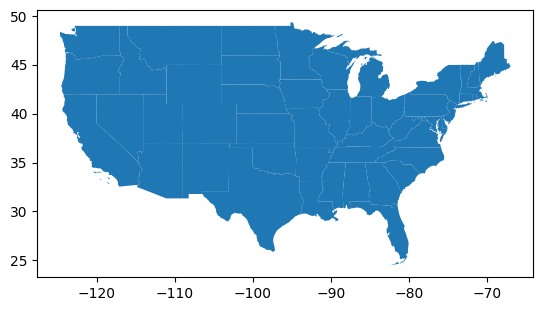

In [68]:
import geopandas as gpd
gdf_usa = gpd.read_file("cb_2023_us_state_20m.shp")
gdf_continential = gdf_usa[~gdf_usa["NAME"].isin(["Alaska", "Hawaii", "Puerto Rico"])]
gdf_continential.plot()

In [69]:
gdf_cities = gpd.GeoDataFrame(usa_data,
                              geometry=gpd.points_from_xy(x=usa_data['lng'], y=usa_data['lat']),
                              crs=gdf_usa.crs)

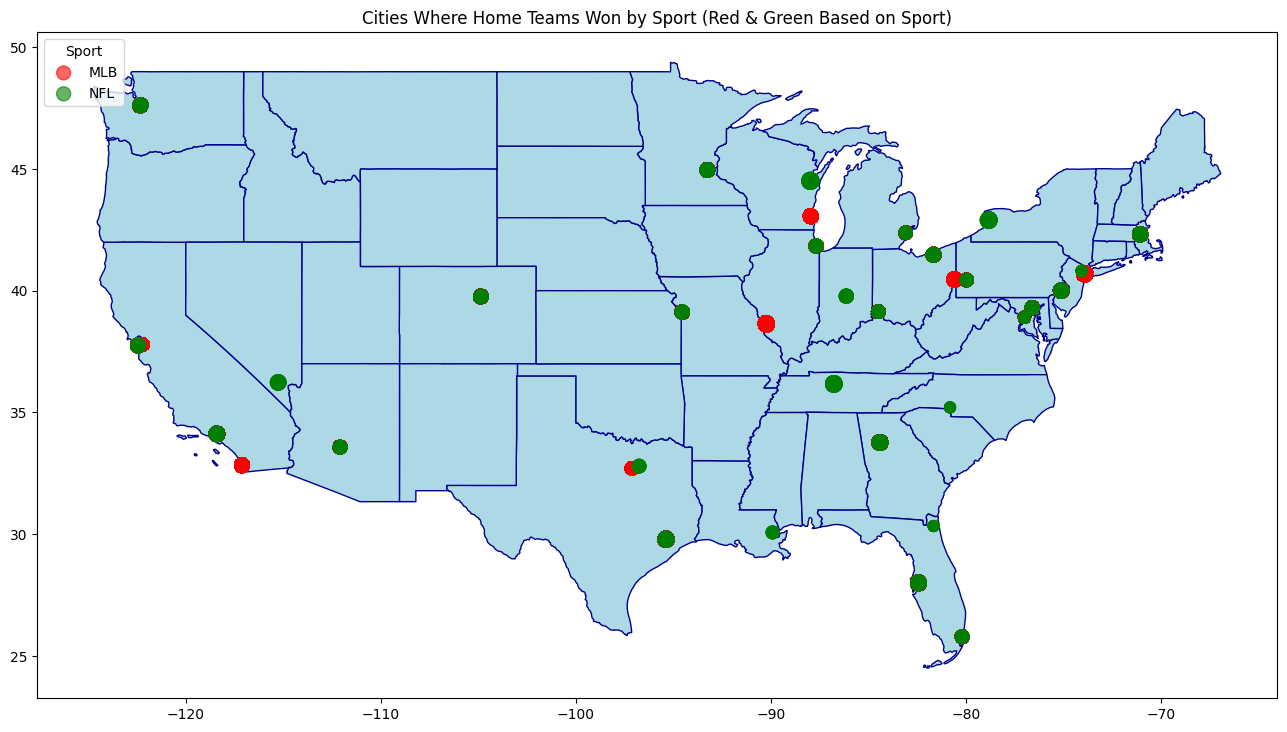

In [101]:
import matplotlib.pyplot as plt

gdf_cities['total_games'] = gdf_cities.groupby(['CITY'])['Home Win'].transform('count')
gdf_cities['home_win_percentage'] = (gdf_cities.groupby(['CITY'])['Home Win'].transform('sum') / gdf_cities['total_games']) * 100

gdf_cities['marker_size'] = gdf_cities['home_win_percentage'].fillna(0) * 2  # Adjust scaling as needed

red_sports = {"MLB"}
green_sports = {"NFL"}

gdf_cities['color'] = gdf_cities['Team'].apply(lambda sport: 'red' if sport in red_sports else 'green')

fig, ax = plt.subplots(figsize=(16, 16))
gdf_continential.plot(ax=ax, edgecolor="darkblue", color="lightblue")

for sport in gdf_cities['Team'].unique():
    subset = gdf_cities[gdf_cities['Team'] == sport]
    subset.plot(
        ax=ax,
        color=subset['color'],
        marker='o',
        markersize=subset['marker_size'],
        alpha=0.6,
        linestyle="None",
        label=sport
    )

plt.legend(title="Sport", loc="upper left")
plt.title("Cities Where Home Teams Won by Sport (Red & Green Based on Sport)")
plt.show()


In [72]:
!unzip "/content/world-administrative-boundaries.zip"

Archive:  /content/world-administrative-boundaries.zip
  inflating: world-administrative-boundaries.prj  
  inflating: world-administrative-boundaries.cpg  
  inflating: world-administrative-boundaries.dbf  
  inflating: world-administrative-boundaries.shp  
  inflating: world-administrative-boundaries.shx  


<Axes: >

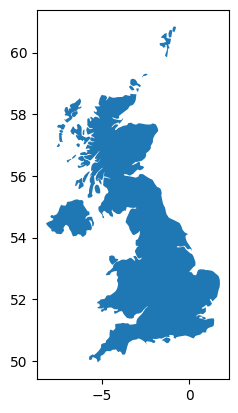

In [87]:
world = gpd.read_file("/content/world-administrative-boundaries.shp")
uk = world[world['name'] == "U.K. of Great Britain and Northern Ireland"]
uk.plot()

In [94]:
gdf_uk = gpd.GeoDataFrame(soccer_data,
                              geometry=gpd.points_from_xy(x=soccer_data['lng'], y=soccer_data['lat']),
                              crs=uk.crs)

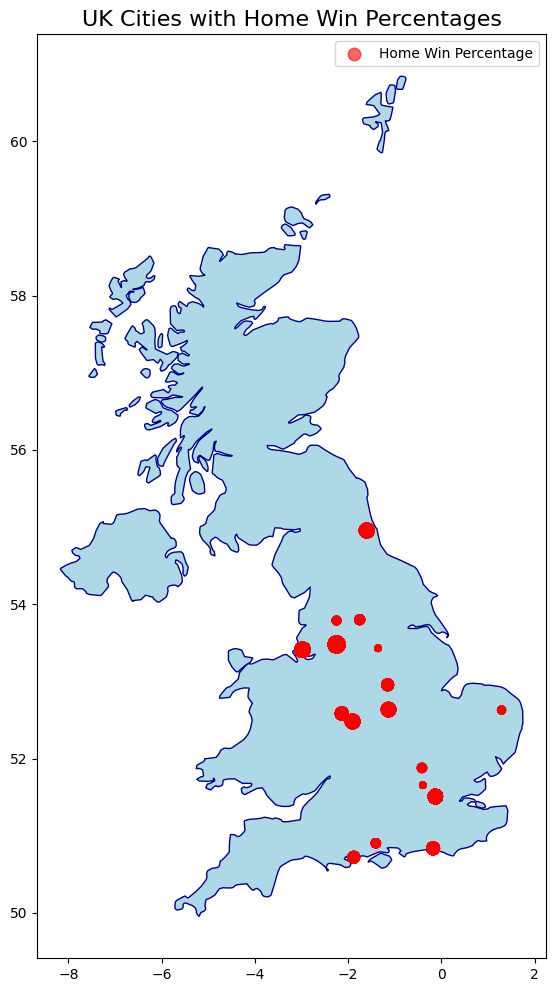

In [102]:
import geopandas as gpd
import matplotlib.pyplot as plt


soccer_data['home_win_percentage'] = soccer_data.groupby('CITY')['Home Win'].transform('mean') * 100

gdf_uk = gpd.GeoDataFrame(soccer_data,
                           geometry=gpd.points_from_xy(x=soccer_data['lng'], y=soccer_data['lat']),
                           crs=uk.crs)

fig, ax = plt.subplots(figsize=(12, 12))
uk.plot(ax=ax, edgecolor="darkblue", color="lightblue")

gdf_uk.plot(
    ax=ax,
    marker='o',
    color='red',
    markersize=gdf_uk['home_win_percentage'] * 2,
    alpha=0.6,
    label="Home Win Percentage"
)

plt.title("UK Cities with Home Win Percentages", fontsize=16)
plt.legend()
plt.show()


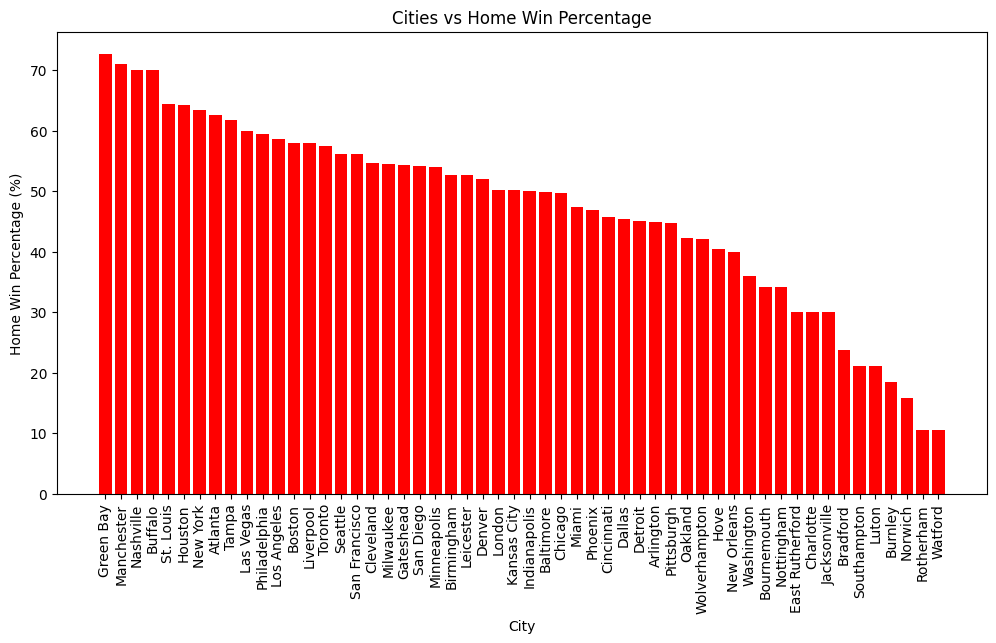

In [97]:
city_game_counts = all_data.groupby("CITY")["Home Win"].count().reset_index()
city_game_counts.rename(columns={"Home Win": "Total Games"}, inplace=True)

city_win_counts = all_data.groupby("CITY")["Home Win"].sum().reset_index()

city_win_counts = city_win_counts.merge(city_game_counts, on="CITY")

city_win_counts["Home Win %"] = (city_win_counts["Home Win"] / city_win_counts["Total Games"]) * 100

city_win_counts = city_win_counts.sort_values("Home Win %", ascending=False)

plt.figure(figsize=(12, 6))
plt.bar(city_win_counts["CITY"], city_win_counts["Home Win %"], color="red")
plt.xticks(rotation=90)
plt.xlabel("City")
plt.ylabel("Home Win Percentage (%)")
plt.title("Cities vs Home Win Percentage")
plt.savefig("cities_vs_home_win_percentage", dpi=300, bbox_inches="tight")
plt.show()


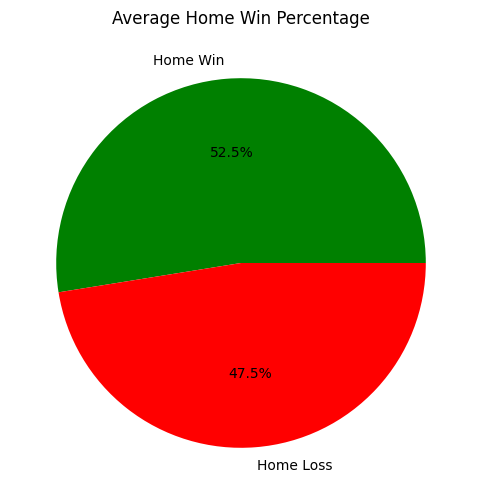

In [92]:
home_win_avg = all_data["Home Win"].mean()

plt.figure(figsize=(6, 6))
plt.pie([home_win_avg, 1 - home_win_avg], labels=["Home Win", "Home Loss"], autopct="%1.1f%%", colors=["green", "red"])
plt.title("Average Home Win Percentage")
plt.savefig("average_home_wins.png", dpi=300, bbox_inches="tight")
plt.show()